# Block-wise single value decomposition

The blockwise implementation can take a while because data has to be read from the disk (all time samples for each block). This can be speed up by having more memory. An alternative approach is the ``svd_approximate`` function that works by averaging the movie.

The blockwise implementation works by:
* running the SVD on overlapping chunks of the movie; 
* computing the SVD on the extracted temporal components;
* combining the blockwise components from each chunk to obtain spatial components
   
Each chunk has all samples in time but only a fraction of pixels - see figure below

Details in wfield-tools/decomposition.py 


In [ ]:
from wfieldtools import *

# parameters
blocksize = 120
overlap = 28

k = 200       # number of feature
block_k = 20  # number of feature per chunk

# load data
localdisk = 'd:\\temp_folder'
dat_path = glob(pjoin(localdisk,'*.dat'))[0]
frames_average = np.load(pjoin(localdisk,'frames_average.npy'))
dat = mmap_dat(dat_path) # load to memory if you have enough

In [1]:
# run the Single Value Decomposition and save to disk
U,SVT,S,(block_U,block_SVT,blocks) = svd_blockwise(dat,
                                                   frames_average,
                                                   k = k, 
                                                   block_k = block_k,
                                                   blocksize=blocksize, 
                                                   overlap=overlap, 
                                                   random_state=42)
# save decomposed data
np.save(pjoin(localdisk,'block_U.npy'),block_U)
np.save(pjoin(localdisk,'block_SVT.npy'),block_SVT)    
np.save(pjoin(localdisk,'U.npy'),U)
np.save(pjoin(localdisk,'S.npy'),S)
np.save(pjoin(localdisk,'SVT.npy'),SVT)

Computing SVD on data chunks:: 100%|██████████| 42/42 [1:34:09<00:00, 134.52s/it]


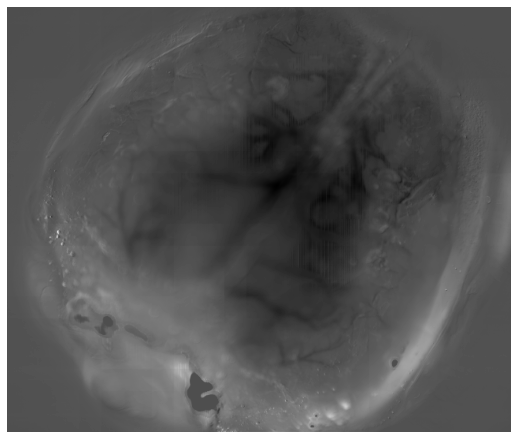

In [2]:
%matplotlib inline
w,h = dat[0,0].shape
imshow_noborder(np.dot(U,SVT[:,500]).reshape(w,h),cmap='gray');


## Defining blocks for computing single value decomposition in chunks

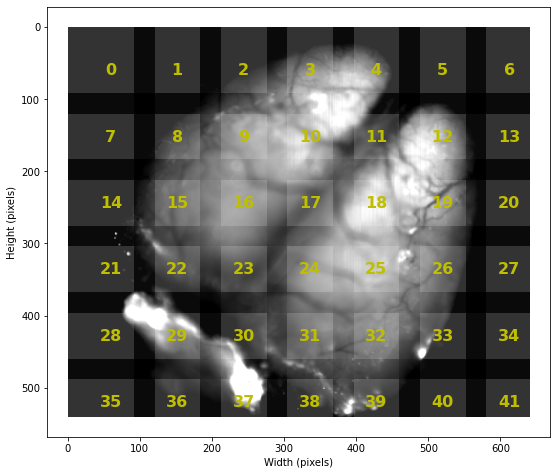

In [11]:
%matplotlib inline

im = frames_average[0]
w,h = im.shape
blocks = make_overlapping_blocks(im.shape,blocksize=blocksize,overlap=overlap)
plt.figure(figsize=[9,9])
ii = 0
for iblock,(i,j) in enumerate(blocks):
    cmap = 'gray'
    if np.mod(ii,2)==0:
        cmap='gray'
    ii+=1
    plt.imshow(im[i[0]:i[1],j[0]:j[1]],cmap=cmap,alpha=.8,origin='bottom',
               extent=[j[0],j[1],i[0],i[1]],clim=np.array([.2,.8])*np.max(im))
    plt.text(j[0]+blocksize/2,i[0]+blocksize/2,str(iblock),color='y',
            va='center',ha='center',fontweight='bold',fontsize=16)
# plt.imshow(im,cmap = 'gray',alpha=.5,origin='bottom')
plt.axis([-overlap,im.shape[1]+overlap,im.shape[0]+overlap,-overlap])
plt.ylabel('Height (pixels)')
plt.xlabel('Width (pixels)');